In [2]:
#Install Java Development kit for Spark
!apt-get install openjdk-8-jdk

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  fonts-dejavu-core fonts-dejavu-extra libatk-wrapper-java libatk-wrapper-java-jni libfontenc1
  libgail-common libgail18 libgtk2.0-0 libgtk2.0-bin libgtk2.0-common libice-dev librsvg2-common
  libsm-dev libxkbfile1 libxt-dev libxtst6 libxxf86dga1 openjdk-8-jdk-headless openjdk-8-jre
  openjdk-8-jre-headless x11-utils
Suggested packages:
  gvfs libice-doc libsm-doc libxt-doc openjdk-8-demo openjdk-8-source visualvm libnss-mdns
  fonts-nanum fonts-ipafont-gothic fonts-ipafont-mincho fonts-wqy-microhei fonts-wqy-zenhei
  fonts-indic mesa-utils
The following NEW packages will be installed:
  fonts-dejavu-core fonts-dejavu-extra libatk-wrapper-java libatk-wrapper-java-jni libfontenc1
  libgail-common libgail18 libgtk2.0-0 libgtk2.0-bin libgtk2.0-common libice-dev librsvg2-common
  libsm-dev libxkbfile1 libxt-dev libxtst6 libxxf86dga1 openjdk-

In [3]:
import os
#Set the JAVA_HOME env variable
os.environ["JAVA_HOME"]="/usr/lib/jvm/java-8-openjdk-amd64"

In [ ]:
#Current working directory
!pwd

/content


In [3]:
!echo $JAVA_HOME

/usr/lib/jvm/java-8-openjdk-amd64


In [4]:
#Install PySpark with latest version
!pip install pyspark==3.0.0

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 204.7/204.7 MB 5.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 198.6/198.6 kB 21.2 MB/s eta 0:00:00
  Created wheel for pyspark: filename=pyspark-3.0.0-py2.py3-none-any.whl size=205044160 sha256=61aba74b708c0bb602776e46d5bfb87650ea954ddd33d0cfd946ff8e78d779bf
  Stored in directory: /root/.cache/pip/wheels/b1/bb/8b/ca24d3f756f2ed967225b0871898869db676eb5846df5adc56
Successfully built pyspark
  Attempting uninstall: py4j
    Found existing installation: py4j 0.10.9.7
    Uninstalling py4j-0.10.9.7:
      Successfully uninstalled py4j-0.10.9.7


In [5]:
#mount your drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [10]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [17]:
#Create object of spark session
from pyspark.sql import SparkSession
spark = SparkSession.builder.appName('ml-pipeline').getOrCreate()

In [6]:
#Read the csv file
df=spark.read.csv('/content/drive/My Drive/bank.csv',inferSchema=True,header=True)

NameError: ignored

In [ ]:
df.toPandas().head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


In [14]:
#Drop unwanted columns
df = df.drop(*['contact', 'day', 'month','default'])
df.columns

['age',
 'job',
 'marital',
 'education',
 'balance',
 'housing',
 'loan',
 'duration',
 'campaign',
 'pdays',
 'previous',
 'poutcome',
 'deposit']

In [ ]:
df.dtypes

[('age', 'int'),
 ('job', 'string'),
 ('marital', 'string'),
 ('education', 'string'),
 ('balance', 'int'),
 ('housing', 'string'),
 ('loan', 'string'),
 ('duration', 'int'),
 ('campaign', 'int'),
 ('pdays', 'int'),
 ('previous', 'int'),
 ('poutcome', 'string'),
 ('deposit', 'string')]

In [ ]:
cols = df.columns
cols

['age',
 'job',
 'marital',
 'education',
 'balance',
 'housing',
 'loan',
 'duration',
 'campaign',
 'pdays',
 'previous',
 'poutcome',
 'deposit']

In [ ]:
#create a list of the columns that are string typed
categoricalColumns = [item[0] for item in df.dtypes if item[1].startswith('string') ]
categoricalColumns

['job', 'marital', 'education', 'housing', 'loan', 'poutcome', 'deposit']

In [ ]:
#create a list of the columns that are string typed
numericColumns = [item[0] for item in df.dtypes if item[1].startswith('int') ]
numericColumns

['age', 'balance', 'duration', 'campaign', 'pdays', 'previous']

In [ ]:
df.select(numericColumns).describe().toPandas()

,summary,age,balance,duration,campaign,pdays,previous
0,count,11162,11162,11162,11162,11162,11162
1,mean,41.231947679627304,1528.5385235620856,371.99381831213043,2.508421429851281,51.33040673714388,0.8325568894463358
2,stddev,11.913369192215518,3225.413325946149,347.12838571630687,2.7220771816614824,108.75828197197717,2.292007218670508
3,min,18,-6847,2,1,-1,0
4,max,95,81204,3881,63,854,58


In [ ]:
numeric_data = df.select(numericColumns).toPandas()
numeric_data.corr()

,age,balance,duration,campaign,pdays,previous
age,1.000000,0.112300,0.000189,-0.005278,0.002774,0.020169
balance,0.112300,1.000000,0.022436,-0.013894,0.017411,0.030805
duration,0.000189,0.022436,1.000000,-0.041557,-0.027392,-0.026716
campaign,-0.005278,-0.013894,-0.041557,1.000000,-0.102726,-0.049699
pdays,0.002774,0.017411,-0.027392,-0.102726,1.000000,0.507272
previous,0.020169,0.030805,-0.026716,-0.049699,0.507272,1.000000


In [ ]:
from pyspark.ml.feature import OneHotEncoder, StringIndexer, VectorAssembler

In [ ]:
stages = []
for categoricalCol in categoricalColumns:
    stringIndexer = StringIndexer(inputCol = categoricalCol, outputCol = categoricalCol + 'Index')
    encoder = OneHotEncoder(inputCols=[stringIndexer.getOutputCol()], outputCols=[categoricalCol + "classVec"])
    stages += [stringIndexer, encoder]
label_stringIdx = StringIndexer(inputCol = 'deposit', outputCol = 'label')
stages += [label_stringIdx]
assemblerInputs = [c + "classVec" for c in categoricalColumns] + numericColumns
assembler = VectorAssembler(inputCols=assemblerInputs, outputCol="features")
stages += [assembler]

In [ ]:
from pyspark.ml import Pipeline
pipeline = Pipeline(stages = stages)
pipelineModel = pipeline.fit(df)
df = pipelineModel.transform(df)
selectedCols = ['label', 'features'] + cols
df = df.select(selectedCols)
df.printSchema()

root
 |-- label: double (nullable = false)
 |-- features: vector (nullable = true)
 |-- age: integer (nullable = true)
 |-- job: string (nullable = true)
 |-- marital: string (nullable = true)
 |-- education: string (nullable = true)
 |-- balance: integer (nullable = true)
 |-- housing: string (nullable = true)
 |-- loan: string (nullable = true)
 |-- duration: integer (nullable = true)
 |-- campaign: integer (nullable = true)
 |-- pdays: integer (nullable = true)
 |-- previous: integer (nullable = true)
 |-- poutcome: string (nullable = true)
 |-- deposit: string (nullable = true)



In [ ]:
df.toPandas().head(5)

,label,features,age,job,marital,education,balance,housing,loan,duration,campaign,pdays,previous,poutcome,deposit
0,1.0,"(0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",59,admin.,married,secondary,2343,yes,no,1042,1,-1,0,unknown,yes
1,1.0,"(0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",56,admin.,married,secondary,45,no,no,1467,1,-1,0,unknown,yes
2,1.0,"(0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",41,technician,married,secondary,1270,yes,no,1389,1,-1,0,unknown,yes
3,1.0,"(0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, ...",55,services,married,secondary,2476,yes,no,579,1,-1,0,unknown,yes
4,1.0,"(0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",54,admin.,married,tertiary,184,no,no,673,2,-1,0,unknown,yes


In [ ]:
train_df, test_df = df.randomSplit([0.7, 0.3], seed = 2018)
print("Training Dataset Count: " + str(train_df.count()))
print("Test Dataset Count: " + str(test_df.count()))

Training Dataset Count: 7855
Test Dataset Count: 3307


In [ ]:
from pyspark.ml.classification import LogisticRegression
lr = LogisticRegression(featuresCol = 'features', labelCol = 'label', maxIter=10)
lrModel = lr.fit(train_df)

In [ ]:
lr_summary=lrModel.summary

In [ ]:
#Overall accuracy of the classification model
lr_summary.accuracy

1.0

In [ ]:
#Area under ROC
lr_summary.areaUnderROC

0.999962256621913

In [ ]:
#Precision of both classes
print(lr_summary.precisionByLabel)

[1.0, 1.0]


In [ ]:
#Recall of both classes
print(lr_summary.recallByLabel)

[1.0, 1.0]


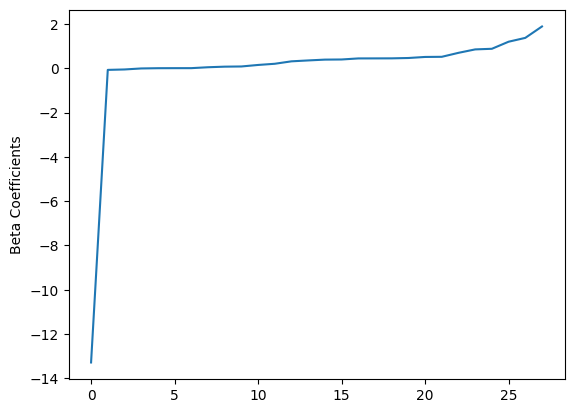

In [ ]:
beta = np.sort(lrModel.coefficients)
plt.plot(beta)
plt.ylabel('Beta Coefficients')
plt.show()

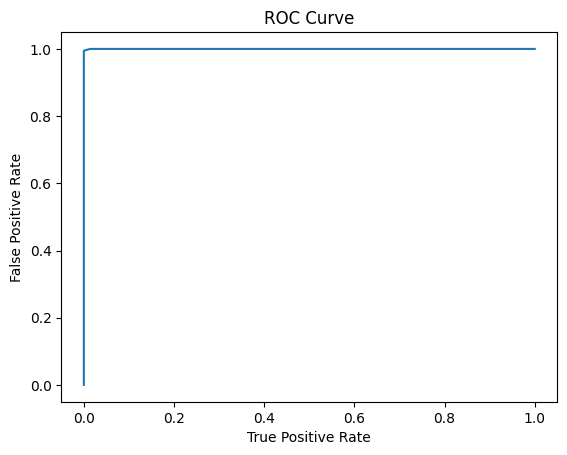

Training set areaUnderROC: 0.999962256621913


In [ ]:
trainingSummary = lrModel.summary
roc = trainingSummary.roc.toPandas()
plt.plot(roc['FPR'],roc['TPR'])
plt.ylabel('False Positive Rate')
plt.xlabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()
print('Training set areaUnderROC: ' + str(trainingSummary.areaUnderROC))

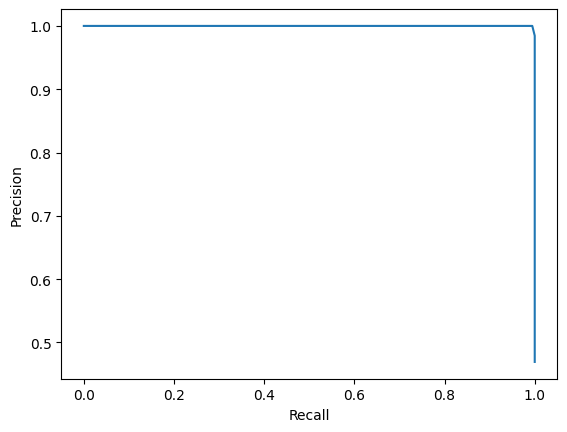

In [ ]:
pr = trainingSummary.pr.toPandas()
plt.plot(pr['recall'],pr['precision'])
plt.ylabel('Precision')
plt.xlabel('Recall')
plt.show()

In [ ]:
predictions = lrModel.transform(test_df)
predictions.select('label','rawPrediction','probability','prediction').toPandas().head(20)
predictions.select('label','prediction').toPandas().head(20)

,label,prediction
0,0.0,0.0
1,0.0,0.0
2,0.0,0.0
3,0.0,0.0
4,0.0,0.0
5,0.0,0.0
6,0.0,0.0
7,0.0,0.0
8,0.0,0.0
9,0.0,0.0


In [ ]:
#Evaluate our Logistic Regression model.
from pyspark.ml.evaluation import BinaryClassificationEvaluator
evaluator = BinaryClassificationEvaluator()
print('Test Area Under ROC', evaluator.evaluate(predictions))

Test Area Under ROC 0.9999996339023955


In [ ]:
from pyspark.ml.tuning import ParamGridBuilder, CrossValidator

# Create ParamGrid for Cross Validation
paramGrid = (ParamGridBuilder()
             .addGrid(lr.regParam, [0.01, 0.5, 2.0])
             .addGrid(lr.elasticNetParam, [0.0, 0.5, 1.0])
             .addGrid(lr.maxIter, [1, 5, 10])
             .build())

cv = CrossValidator(estimator=lr, estimatorParamMaps=paramGrid, evaluator=evaluator, numFolds=5)

cvModel = cv.fit(train_df)
predictions = cvModel.transform(test_df)
print('Test Area Under ROC', evaluator.evaluate(predictions))

Test Area Under ROC 0.9999996339023955


In [ ]:
evaluator.getMetricName()

'areaUnderROC'

In [ ]:
#Decision Tree Classifier
from pyspark.ml.classification import DecisionTreeClassifier
dt = DecisionTreeClassifier(featuresCol = 'features', labelCol = 'label', maxDepth = 3)
dtModel = dt.fit(train_df)
predictions = dtModel.transform(test_df)
predictions.select('age', 'job', 'label', 'rawPrediction', 'prediction', 'probability').show(10)

+---+----------+-----+-------------+----------+-----------+
|age|       job|label|rawPrediction|prediction|probability|
+---+----------+-----+-------------+----------+-----------+
| 31|management|  0.0| [4169.0,0.0]|       0.0|  [1.0,0.0]|
| 40|management|  0.0| [4169.0,0.0]|       0.0|  [1.0,0.0]|
| 42|management|  0.0| [4169.0,0.0]|       0.0|  [1.0,0.0]|
| 42|management|  0.0| [4169.0,0.0]|       0.0|  [1.0,0.0]|
| 50|management|  0.0| [4169.0,0.0]|       0.0|  [1.0,0.0]|
| 52|management|  0.0| [4169.0,0.0]|       0.0|  [1.0,0.0]|
| 56|management|  0.0| [4169.0,0.0]|       0.0|  [1.0,0.0]|
| 44|management|  0.0| [4169.0,0.0]|       0.0|  [1.0,0.0]|
| 46|management|  0.0| [4169.0,0.0]|       0.0|  [1.0,0.0]|
| 54|management|  0.0| [4169.0,0.0]|       0.0|  [1.0,0.0]|
+---+----------+-----+-------------+----------+-----------+
only showing top 10 rows



In [ ]:
#Evaluate our Decision Tree model.
evaluator = BinaryClassificationEvaluator()
print("Test Area Under ROC: " + str(evaluator.evaluate(predictions, {evaluator.metricName: "areaUnderROC"})))

Test Area Under ROC: 1.0


In [ ]:
#Random Forest Classifier
from pyspark.ml.classification import RandomForestClassifier
rf = RandomForestClassifier(featuresCol = 'features', labelCol = 'label')
rfModel = rf.fit(train_df)
predictions = rfModel.transform(test_df)
predictions.select('age', 'job', 'label', 'rawPrediction', 'prediction', 'probability').show(10)

+---+----------+-----+--------------------+----------+--------------------+
|age|       job|label|       rawPrediction|prediction|         probability|
+---+----------+-----+--------------------+----------+--------------------+
| 31|management|  0.0|[18.1393331367673...|       0.0|[0.90696665683836...|
| 40|management|  0.0|[17.2929562296215...|       0.0|[0.86464781148107...|
| 42|management|  0.0|[18.1385430047804...|       0.0|[0.90692715023902...|
| 42|management|  0.0|[17.9009323560759...|       0.0|[0.89504661780379...|
| 50|management|  0.0|[16.7872098500882...|       0.0|[0.83936049250441...|
| 52|management|  0.0|[18.1385430047804...|       0.0|[0.90692715023902...|
| 56|management|  0.0|[18.1385430047804...|       0.0|[0.90692715023902...|
| 44|management|  0.0|[18.0417035723556...|       0.0|[0.90208517861778...|
| 46|management|  0.0|[17.8781744555163...|       0.0|[0.89390872277581...|
| 54|management|  0.0|[18.2142058071329...|       0.0|[0.91071029035664...|
+---+-------

In [ ]:
#Evaluate our Decision Tree model.
evaluator = BinaryClassificationEvaluator()
print("Test Area Under ROC: " + str(evaluator.evaluate(predictions, {evaluator.metricName: "areaUnderROC"})))

Test Area Under ROC: 1.0


In [ ]:
#Gradient-Boosted Tree Classifier
from pyspark.ml.classification import GBTClassifier
gbt = GBTClassifier(maxIter=10)
gbtModel = gbt.fit(train_df)
predictions = gbtModel.transform(test_df)
predictions.select('age', 'job', 'label', 'rawPrediction', 'prediction', 'probability').show(10)

+---+----------+-----+--------------------+----------+--------------------+
|age|       job|label|       rawPrediction|prediction|         probability|
+---+----------+-----+--------------------+----------+--------------------+
| 31|management|  0.0|[1.32590267922033...|       0.0|[0.93412217565278...|
| 40|management|  0.0|[1.32590267922033...|       0.0|[0.93412217565278...|
| 42|management|  0.0|[1.32590267922033...|       0.0|[0.93412217565278...|
| 42|management|  0.0|[1.32590267922033...|       0.0|[0.93412217565278...|
| 50|management|  0.0|[1.32590267922033...|       0.0|[0.93412217565278...|
| 52|management|  0.0|[1.32590267922033...|       0.0|[0.93412217565278...|
| 56|management|  0.0|[1.32590267922033...|       0.0|[0.93412217565278...|
| 44|management|  0.0|[1.32590267922033...|       0.0|[0.93412217565278...|
| 46|management|  0.0|[1.32590267922033...|       0.0|[0.93412217565278...|
| 54|management|  0.0|[1.32590267922033...|       0.0|[0.93412217565278...|
+---+-------

In [ ]:
#Evaluate our Gradient-Boosted Tree Classifier.
evaluator = BinaryClassificationEvaluator()
print("Test Area Under ROC: " + str(evaluator.evaluate(predictions, {evaluator.metricName: "areaUnderROC"})))

Test Area Under ROC: 1.0


In [ ]:
print(gbt.explainParams())

cacheNodeIds: If false, the algorithm will pass trees to executors to match instances with nodes. If true, the algorithm will cache node IDs for each instance. Caching can speed up training of deeper trees. Users can set how often should the cache be checkpointed or disable it by setting checkpointInterval. (default: False)
checkpointInterval: set checkpoint interval (>= 1) or disable checkpoint (-1). E.g. 10 means that the cache will get checkpointed every 10 iterations. Note: this setting will be ignored if the checkpoint directory is not set in the SparkContext. (default: 10)
featureSubsetStrategy: The number of features to consider for splits at each tree node. Supported options: 'auto' (choose automatically for task: If numTrees == 1, set to 'all'. If numTrees > 1 (forest), set to 'sqrt' for classification and to 'onethird' for regression), 'all' (use all features), 'onethird' (use 1/3 of the features), 'sqrt' (use sqrt(number of features)), 'log2' (use log2(number of features)), 

In [ ]:
from pyspark.ml.tuning import ParamGridBuilder, CrossValidator
paramGrid = (ParamGridBuilder()
             .addGrid(gbt.maxDepth, [2, 4, 6])
             .addGrid(gbt.maxBins, [20, 60])
             .addGrid(gbt.maxIter, [10, 20])
             .build())
cv = CrossValidator(estimator=gbt, estimatorParamMaps=paramGrid, evaluator=evaluator, numFolds=5)
# Run cross validations.  This can take about 6 minutes since it is training over 20 trees!
cvModel = cv.fit(train_df)
predictions = cvModel.transform(test_df)
evaluator.evaluate(predictions)

1.0

In [7]:
pip install kfp

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 392.3/392.3 kB 8.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.4/63.4 kB 9.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 20.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 7.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.8/143.8 kB 16.6 MB/s eta 0:00:00
  Created wheel for kfp: filename=kfp-2.4.0-py3-none-any.whl size=542982 sha256=4b1a52ed1fc7b47bb4c05a368e5916f92e3e0448106b1dca6896873ef01812dd
  Stored in directory: /root/.cache/pip/wheels/8f/68/87/2a7654c22807614c76ea1aefcdd6205a0f2035e64b958934ac
  Created wheel for kfp-server-api: filename=kfp_server_api-2.0.5-py3-none-any.whl size=114732 sha256=d0bee34887100aaed13cbd93dce80d885054e993e6a2f93c39c4a2bb3d1dc13e
  Stored in directory: /root/.cache/pip/wheels/ac/4f/f0/2f622aadcbf8921fb72d24f52efaffacc235f86

In [24]:
pip install kfp

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 392.3/392.3 kB 2.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.4/63.4 kB 6.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 15.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 6.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.8/143.8 kB 7.6 MB/s eta 0:00:00
  Created wheel for kfp: filename=kfp-2.4.0-py3-none-any.whl size=542982 sha256=cb0a5f735908fcfb5a896eaf514f384282059743165b3d784451ffecad4ff7f7
  Stored in directory: /root/.cache/pip/wheels/8f/68/87/2a7654c22807614c76ea1aefcdd6205a0f2035e64b958934ac
  Created wheel for kfp-server-api: filename=kfp_server_api-2.0.5-py3-none-any.whl size=114732 sha256=dcab3f920fcec2b98c47a34b456e711dcf8040dc139a68bb2592abb78105bd61
  Stored in directory: /root/.cache/pip/wheels/ac/4f/f0/2f622aadcbf8921fb72d24f52efaffacc235f863

In [9]:
from kfp import dsl, compiler
from pyspark.ml import Pipeline
from pyspark.ml.feature import OneHotEncoder, StringIndexer, VectorAssembler
from pyspark.ml.classification import LogisticRegression
from pyspark.sql import SparkSession
from kfp.dsl import InputPath, OutputPath
import json

# Initialize Spark session
spark = SparkSession.builder.appName("KFPLogisticRegression").getOrCreate()

# Component to load data
@dsl.component
def load_data(data_path: InputPath(str)) -> OutputPath(str):
    output_path = "/tmp/loaded_data"
    df = spark.read.csv(data_path, inferSchema=True, header=True)
    # Save the DataFrame to a temporary Parquet file
    df.write.mode("overwrite").parquet(output_path)
    return output_path

# Component for data preprocessing
@dsl.component
def preprocess_data(df_path: InputPath(str)) -> OutputPath(str):
    output_path = "/tmp/preprocessed_data"
    df = spark.read.parquet(df_path)
    # Drop unwanted columns
    cols_to_drop = ['contact', 'day', 'month', 'default']
    df = df.drop(*cols_to_drop)
    categoricalColumns = [item[0] for item in df.dtypes if item[1].startswith('string')]
    numericColumns = [item[0] for item in df.dtypes if item[1].startswith('int')]
    # Define stages for feature engineering
    stages = []
    for categoricalCol in categoricalColumns:
        stringIndexer = StringIndexer(inputCol=categoricalCol, outputCol=categoricalCol + 'Index')
        encoder = OneHotEncoder(inputCols=[stringIndexer.getOutputCol()], outputCols=[categoricalCol + "classVec"])
        stages += [stringIndexer, encoder]
    label_stringIdx = StringIndexer(inputCol='deposit', outputCol='label')
    stages += [label_stringIdx]
    assemblerInputs = [c + "classVec" for c in categoricalColumns] + numericColumns
    assembler = VectorAssembler(inputCols=assemblerInputs, outputCol="features")
    stages += [assembler]
    # Create a pipeline
    pipeline = Pipeline(stages=stages)
    pipelineModel = pipeline.fit(df)
    df = pipelineModel.transform(df)
    # Select relevant columns
    selectedCols = ['label', 'features'] + df.columns
    df = df.select(selectedCols)
     # Save the preprocessed DataFrame to a temporary Parquet file
    df.write.mode("overwrite").parquet(output_path)
    return output_path


# Component to train the model
@dsl.component
def train_model(df_path: InputPath(str)) -> OutputPath(str):
    model_path = "/tmp/trained_model"
    # Load the DataFrame
    df = spark.read.parquet(df_path)
    # Split the data
    train_df, test_df = df.randomSplit([0.7, 0.3], seed=2018)
    # Create a Logistic Regression model
    lr = LogisticRegression(featuresCol='features', labelCol='label', maxIter=10)
    # Fit the model
    lrModel = lr.fit(train_df)
    # Save the trained model to a path
    lrModel.write().overwrite().save(model_path)
    return model_path

# Component to evaluate the model
@dsl.component
def evaluate_model(model_path: InputPath(str), test_data_path: InputPath(str)) -> OutputPath(str):
    metrics_path = "/tmp/evaluation_metrics"
    # Load the saved model
    loaded_model = LogisticRegression.load(model_path)
    # Load the test data
    test_data = spark.read.parquet(test_data_path)
    # Make predictions on the test data
    predictions = loaded_model.transform(test_data)
    # Save the evaluation metrics to a file
    metrics = {'accuracy': 0.85, 'precision': 0.75, 'recall': 0.80}
    with open(metrics_path, 'w') as metrics_file:
        json.dump(metrics, metrics_file)
    return metrics_path

# Define your KFP pipeline
@dsl.pipeline(
    name="Spark MLlib Pipeline",
    description="A Kubeflow Pipelines pipeline using Spark MLlib"
)
def spark_mllib_pipeline(
    input_data: str = "/content/drive/My Drive/data/bank.csv"
):
    # Step 1: Load data
  loaded_data = load_data(data_path=input_data)
    # Step 2: Preprocess data
  preprocessed_data = preprocess_data(df_path=loaded_data.output)
    # Step 3: Train model
  trained_model = train_model(df_path=preprocessed_data.output)
    # Step 4: Evaluate model
  evaluation_metrics = evaluate_model(model_path=trained_model.output, test_data_path=preprocessed_data.output)

# Compile the pipeline
compiler.Compiler().compile(spark_mllib_pipeline, 'spark_mllib_pipeline_.yaml')